In [1]:
"""Stochastic simulation"""

import stochpy
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm


#######################################################################
#                                                                     #
#            Welcome to the interactive StochPy environment           #
#                                                                     #
#######################################################################
#  StochPy: Stochastic modeling in Python                             #
#  http://stochpy.sourceforge.net                                     #
#  Copyright(C) T.R Maarleveld, B.G. Olivier, F.J Bruggeman 2010-2015 #
#  DOI: 10.1371/journal.pone.0079345                                  #
#  Email: tmd200@users.sourceforge.net                                #
#  VU University, Amsterdam, Netherlands                              #
#  Centrum Wiskunde Informatica, Amsterdam, Netherlands               #
#  StochPy is distributed under the BSD licence.                      #
###############################################################

In [2]:
# simulaton 

simulation = stochpy.SSA()
simulation.Model('/Users/hyamaguchi/Dropbox/Share/ForGitHub/STARProtocols2021/Sample_chaos.psc')
simulation.DoStochSim(mode='time', end=300, quiet=False)

label index: 
0 Sa00
1 E
2 ESa1
3 Sa01
4 ESa2
5 Sa10
6 ESa3
7 Sa11
8 ESa4
9 F
10 FSa5
11 FSa6
12 FSa7
13 FSa8
14 Sb00
15 ESb9
16 Sb01
17 ESb10
18 Sb10
19 ESb11
20 Sb11
21 ESb12
22 FSb13
23 FSb14
24 FSb15
25 FSb16


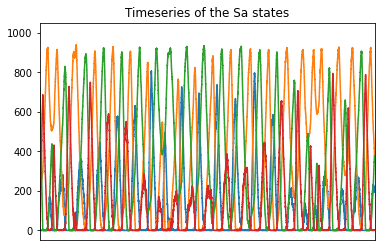

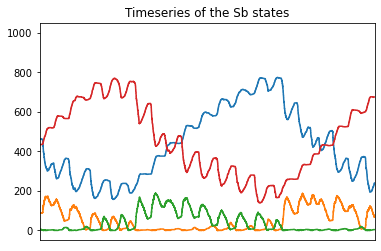

In [3]:
# for data visualization

# extract num. of molecules of each state after reactions
data = simulation.data_stochsim.species

print('label index: ')
labels = simulation.data_stochsim.species_labels
for i, label in enumerate(labels):
    print(i, label)

E = [1]
F = [9]

Sa = [0, 3, 5, 7]
ESa = [2, 4, 6, 8]
FSa = [10, 11, 12, 13]
Sb = [14, 16, 18, 20]
ESb = [15, 17, 19, 21]
FSb = [22, 23, 24, 25]


plt.plot(data[:, Sa])
plt.xlim(2000000, 2200000)
plt.title('Timeseries of the Sa states')
plt.xticks([])
plt.show()
plt.close()

plt.plot(data[:, Sb])
plt.xlim(2000000, 2200000)
plt.title('Timeseries of the Sb states')
plt.xticks([])
plt.show()
plt.close()

3085271it [00:50, 61178.77it/s]
3085271it [00:25, 120637.82it/s]
3085271it [00:22, 136632.75it/s]
3085271it [00:22, 135716.13it/s]
100%|██████████| 100/100 [00:00<00:00, 108.26it/s]


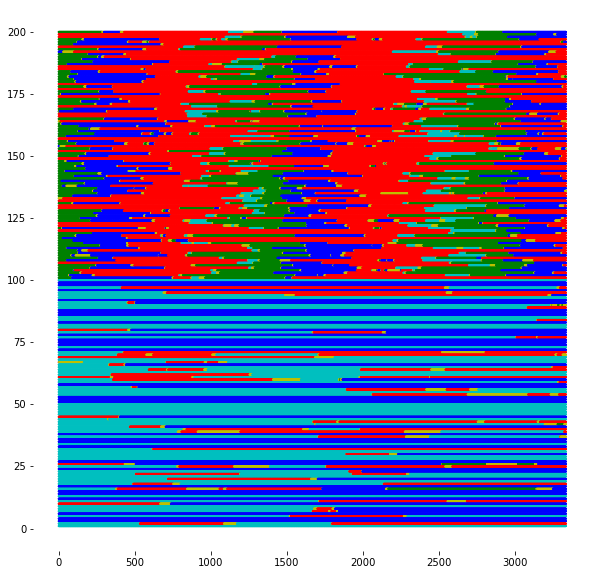

100%|██████████| 20/20 [00:00<00:00, 106.17it/s]


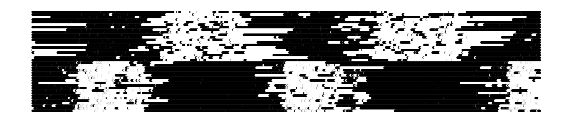

In [4]:
def emulate_substrate_states(simulation, a_or_b):
    """
    Set label about which state every single substrate molecule is in.
    
    Parameters
    --------------
    simulation : stochpy instance
    Simulated stochpy instance.
    a_or_b : str
    Which side of substrate molecules to set labels. 'a' or 'b'.
    
    Returns
    ----------
    state_molecules : array
    The reconstructed state of substrate molecules at each reaction.
    """
    
    labels = simulation.data_stochsim.species_labels
    n_mol = simulation.data_stochsim.species[0][0]
    this_substrate = []
    for i_label, label in enumerate(labels):
        if a_or_b in label:
            this_substrate.append(i_label)
    
    data = simulation.data_stochsim.species[:, this_substrate].astype(float) # load data
    state_molecules = np.zeros((data.shape[0], n_mol)) # initialize current molecule state. size=(time, n_molecules)
    d_substrate = np.diff(data, axis=0) # molecule transition. At each time, molecule transforms from column of -1 to 1.
    for t, d in tqdm(enumerate(d_substrate, start=1)):
        state_molecules[t] = state_molecules[t-1]
        if  any(d>0):
            before_state = np.where(d==-1)[0][0] # column of -1
            after_state = np.where(d==1)[0][0] # column of 1
            state_molecules_thisstate = np.where(state_molecules[t]==before_state)[0] # candidate molecules that transforms
            n_molecules_thisstate = state_molecules_thisstate.shape[0] # number of candidate molecules
            which_molecule = np.random.randint(n_molecules_thisstate) # choose single molecule randomly from candidates
            state_molecules[t, state_molecules_thisstate[which_molecule]] = after_state # update molecule state
    return(state_molecules)

def emulate_enzyme_states(simulation, E_or_F):
    """
    Set label about which state every single enzyme molecule is in.
    
    Parameters
    --------------
    simulation : stochpy instance
    Simulated stochpy instance.
    E_or_F : str
    Which enzyme molecules to set labels. 'E' or 'F'.
    
    Returns
    ----------
    state_molecules : array
    The reconstructed state of enzyme molecules at each reaction.
    """
    
    labels = simulation.data_stochsim.species_labels
    n_mol = simulation.data_stochsim.species[0][1]
    if E_or_F=='E':
        this_enzyme = [1, 2, 4, 6, 8, 15, 17, 19, 21]
    elif E_or_F=='F':
        this_enzyme = [9, 10, 11, 12, 13, 22, 23, 24, 25]
    
    data = simulation.data_stochsim.species[:, this_enzyme].astype(float) # load data
    state_molecules = np.zeros((data.shape[0], n_mol)) # initialize current molecule state. size=(time, n_molecules)
    d_enzyme = np.diff(data, axis=0) # molecule transition. At each time, molecule transforms from column of -1 to 1.
    for t, d in tqdm(enumerate(d_enzyme, start=1)):
        state_molecules[t] = state_molecules[t-1]
        if  any(d>0):
            before_state = np.where(d==-1)[0][0] # column of -1
            after_state = np.where(d==1)[0][0] # column of 1
            state_molecules_thisstate = np.where(state_molecules[t]==before_state)[0] # candidate molecules that transforms
            n_molecules_thisstate = state_molecules_thisstate.shape[0] # number of candidate molecules
            which_molecule = np.random.randint(n_molecules_thisstate) # choose single molecule randomly from candidates
            state_molecules[t, state_molecules_thisstate[which_molecule]] = after_state # update molecule state
    return(state_molecules)

def visualize_substrate_states(states_Sa, states_Sb, simulation, windowtype='default'):
    """
    Visualize which states molecules are in within a certain time window.
    
    Parameters
    --------------
    states_Sa : array
    Molecule states of substrate a reconstructed using the function 'emulate_substrate_states'.
    states_Sb : array
    Molecule states of substrate b reconstructed using the function 'emulate_substrate_states.
    simulation : stochpy instance
    Simulated stochpy instance.
    windowtype : str
    Specify which time window to use for visualization.
    """
    
    n_mol = simulation.data_stochsim.species[0][0]
    if windowtype=='default':
        t_start = 20000
        s = 1
        n_plot = 100
        step = 6
        
    if n_plot>n_mol:
        n_plot = n_mol
    
    
    time = simulation.data_stochsim.time
    t_plot = time[-t_start::step]
    plot_molecule_a = states_Sa[-t_start::step, :n_plot]
    plot_molecule_b = states_Sb[-t_start::step, :n_plot]

    plt.figure(figsize=(10, 10))
    for row in tqdm(range(n_plot)):
        color_by_state = []
        for state in plot_molecule_a[:, row]:
            if state==0:
                color_by_state.append('b')
            elif state==2:
                color_by_state.append('g')        
            elif state==4:
                color_by_state.append('r')
            elif state==6:
                color_by_state.append('c')
            else:
                color_by_state.append('y')
        plt.scatter(np.arange(t_plot.shape[0]), (2*n_plot-row)*np.ones(t_plot.shape[0]), c=color_by_state, s=s)
    for row in tqdm(range(n_plot)):
        color_by_state = []
        for state in plot_molecule_b[:, row]:
            if state==0:
                color_by_state.append('b')
            elif state==2:
                color_by_state.append('g')        
            elif state==4:
                color_by_state.append('r')
            elif state==6:
                color_by_state.append('c')
            else:
                color_by_state.append('y')
        plt.scatter(np.arange(t_plot.shape[0]), (n_plot-row)*np.ones(t_plot.shape[0]), c=color_by_state, s=s)
    for spine in plt.gca().spines.values():
        spine.set_visible(False)
    plt.show()
    plt.close()

def visualize_enzyme_states(states_E, states_F, simulation, windowtype='default'):
    """
    Visualize which states molecules are in within a certain time window.
    
    Parameters
    --------------
    states_E : array
    Molecule states of kinase reconstructed using the function 'emulate_enzyme_states'.
    states_F : array
    Molecule states of phosphatase b reconstructed using the function 'emulate_enzyme_states'.
    simulation : stochpy instance
    Simulated stochpy instance.
    windowtype : str
    Specify which time window to use for visualization.
    """
    
    n_mol = simulation.data_stochsim.species[0][0]
    if windowtype=='default':
        t_start = 20000
        s = 1
        n_plot = 20
        step = 6
        
    if n_plot>n_mol:
        n_plot = n_mol
    
    
    time = simulation.data_stochsim.time
    t_plot = time[-t_start::step]
    plot_molecule_E = states_E[-t_start::step, :n_plot]
    plot_molecule_F = states_F[-t_start::step, :n_plot]

    plt.figure(figsize=(10, 2))

    for row in tqdm(range(n_plot)):
        color_by_state = []
        for state in plot_molecule_E[:, row]:
            if state==0:
                color_by_state.append('grey')
            elif 1<=state<=4:
                color_by_state.append('black')
            elif 5<=state<=8:
                color_by_state.append('white')
        plt.scatter(np.arange(t_plot.shape[0]), (2*n_plot-row)*np.ones(t_plot.shape[0]), c=color_by_state, s=s)
    
    for row in tqdm(range(n_plot)):
        color_by_state = []
        for state in plot_molecule_F[:, row]:
            if state==0:
                color_by_state.append('grey')
            elif 1<=state<=4:
                color_by_state.append('black')
            elif 5<=state<=8:
                color_by_state.append('white')
        plt.scatter(np.arange(t_plot.shape[0]), (n_plot-row)*np.ones(t_plot.shape[0]), c=color_by_state, s=s)
    for spine in plt.gca().spines.values():
        spine.set_visible(False)
    plt.axis('off')
    plt.show()
    plt.close()

states_Sa = emulate_substrate_states(simulation, 'a')
states_Sb = emulate_substrate_states(simulation, 'b')

states_E = emulate_enzyme_states(simulation, 'E')
states_F = emulate_enzyme_states(simulation, 'F')

visualize_substrate_states(states_Sa, states_Sb, simulation)
visualize_enzyme_states(states_E, states_F, simulation)

/Users/hyamaguchi/opt/miniconda3/envs/py36/lib/python3.6/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


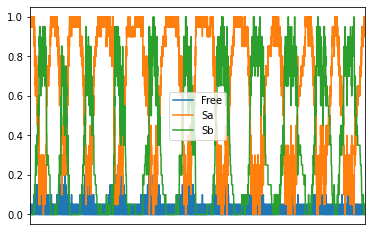

In [5]:
def group_wise_proportion(states, labels):
    """
    Return the proportion of specific states.
    
    Parameters
    --------------
    state : array
    Molecule states reconstructed using the function 'reconstruct_*_states'.
    labels : list
    List of label index that specify the grouping of states.
    For each substrate or enzyme, all the possible state should be included once in a group.
    
    Returns
    ----------
    proportion : array
    The proportion of group-wise molecule states.
    """
    
    proportion = np.zeros((states.shape[0], len(labels)))
    for il, l in enumerate(labels):
        for thisl in l:
            proportion[:, il] += np.sum(1*(states==thisl), axis=1)/states.shape[1]
    return(proportion)

proportion = group_wise_proportion(states_E, [[0], [1, 2, 3, 4], [5, 6, 7, 8]])

plt.plot(proportion)
plt.xlim(proportion.shape[0]-100000, proportion.shape[0])
plt.legend(['Free', 'Sa', 'Sb'])
plt.xticks([])
plt.show()
plt.close()